In [1]:
# IMPORT Libraries
import pandas as pd
#from pandasql import sqldf as psql
import numpy as np
import plotly.express as px
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import joblib
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from math import pi


Import red and white csv files and merge them into one dataframe:

In [2]:

df_white = pd.read_csv('path')
df_red = pd.read_csv('path')

In [3]:
print("White wine DF shape ->", df_white.shape)
print("Red wine DF shape ->", df_red.shape)
print("")
print(df_white.columns)

White wine DF shape -> (4898, 12)
Red wine DF shape -> (1599, 12)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [ ]:
##### CONCAT DFs and ADD new COLUMN (wine_type)
df_red.insert(len(df_red.columns), "wine_type", "red", allow_duplicates=True)
df_white.insert(len(df_white.columns), "wine_type", "white", allow_duplicates=True)

frames = [df_white, df_red]

df_redwhite = pd.concat(frames)

## DF(red_white) EXPORT
#df_redwhite.to_csv('export_path')

# IMPORT DF(red_white)
#df_redwhite = pd.read_csv('df_redwhite_path')

Data Preparation and Transformation:

In [ ]:
# Rename Column name to remove spaces
df_redwhite.rename(columns = {"fixed acidity":"fixed_acidity", "volatile acidity":"volatile_acidity", "citric acid":"citric_acid", "residual sugar":"residual_sugar" , "free sulfur dioxide":"free_sulfur_dioxide", "total sulfur dioxide":"total_sulfur_dioxide"}, inplace = True)

# New Column, if 
bin1 = [0,6,10]
category1 = ['0-6','07-10']
df_redwhite['quality_bin'] = pd.cut(df_redwhite["quality"],bin1,labels = category1)

df_redwhite['quality_bin'] = df_redwhite['quality_bin'].replace("0-6", 0)
df_redwhite['quality_bin'] = df_redwhite['quality_bin'].replace("07-10", 1)

# SPLIT CONTINIOUS VARIABLES
df_redwhite_continuous = df_redwhite[['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

# LOG10 TRANSFORMATION
df_log10 = np.log10((df_redwhite_continuous))
df_log10['quality_bin'] = df_redwhite['quality_bin']

# LOG(x+1) TRANSFORMATION
# apply log(x+1) element-wise to a subset of columns
to_log = ['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
df_log = df_redwhite[to_log].applymap(lambda x: np.log(x+1))

# rename columns
df_log.columns = 'log_' + df_log.columns
df_log['quality_bin'] = df_redwhite['quality_bin']
# shift the index
df_log.index = df_log.index + 1

Correlation Heatmap:

Text(0.5, 1.0, 'Correlation Heatmap')

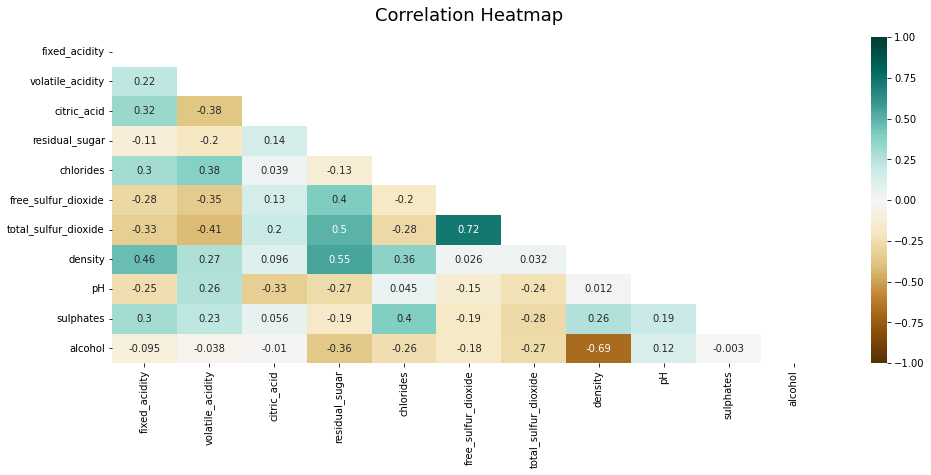

In [8]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_redwhite_continuous[['fixed_acidity', 'volatile_acidity', 'citric_acid',
                                                 'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
                                                 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']].corr(), dtype=np.bool))
heatmap = sns.heatmap(df_redwhite_continuous[['fixed_acidity', 'volatile_acidity', 'citric_acid',
                                             'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
                                            'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [9]:
# Individual correlation heatmap function

def heatmap_cor(variable_name):
    plt.figure(figsize=(8, 12))
    heatmap = sns.heatmap(df_redwhite_continuous.corr()[[variable_name]].sort_values(by=variable_name, ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title(variable_name + " correlation", fontdict={'fontsize':18}, pad=16)

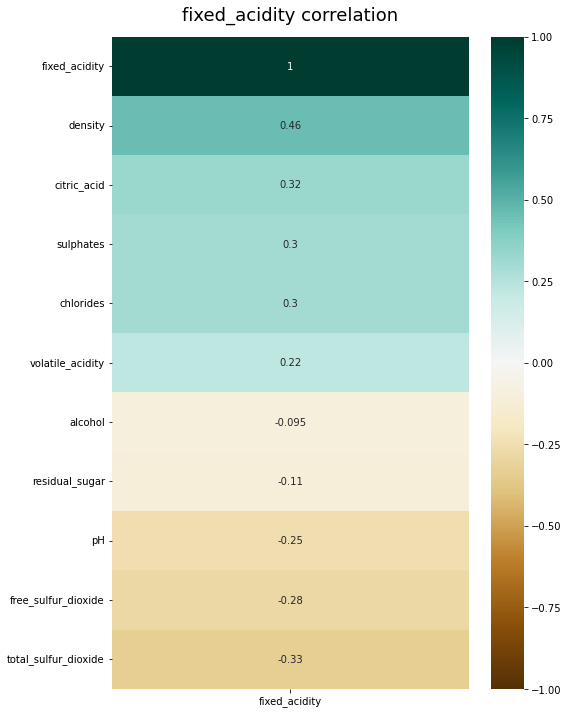

In [10]:
heatmap_cor('fixed_acidity')

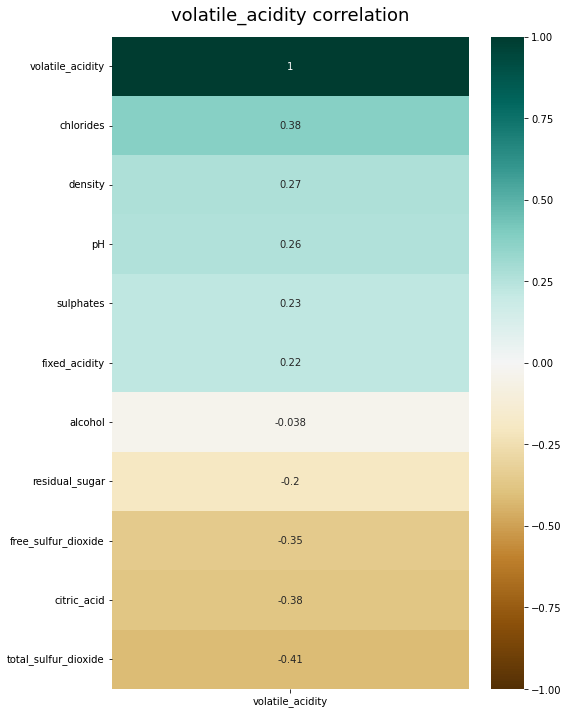

In [11]:
heatmap_cor('volatile_acidity')

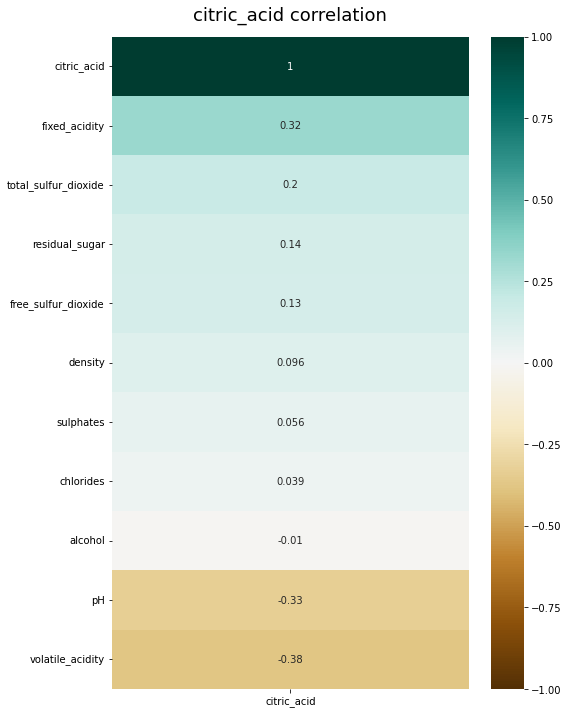

In [12]:
heatmap_cor('citric_acid')

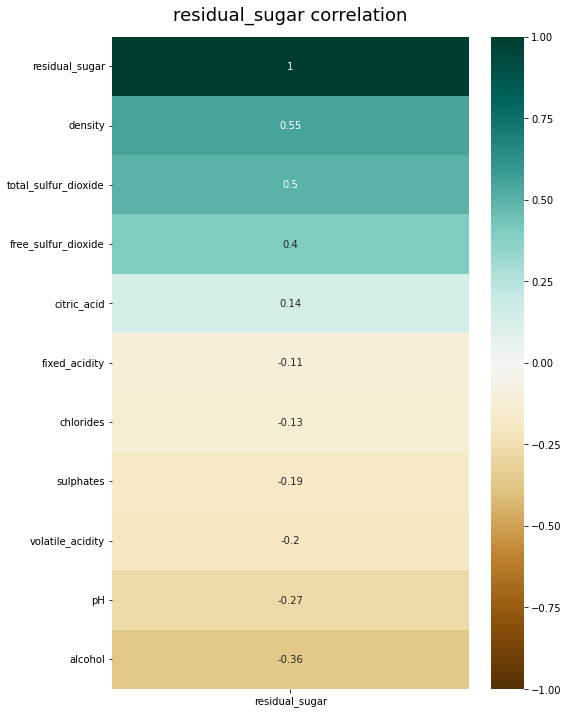

In [13]:
heatmap_cor('residual_sugar')

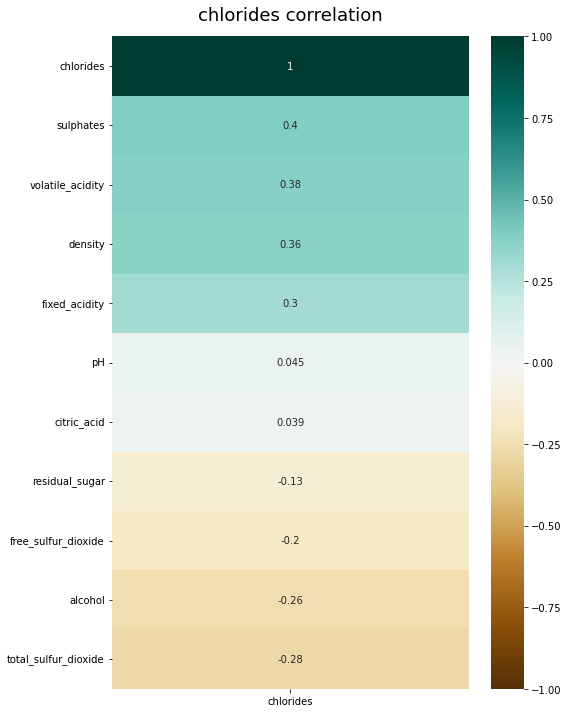

In [14]:
heatmap_cor('chlorides')

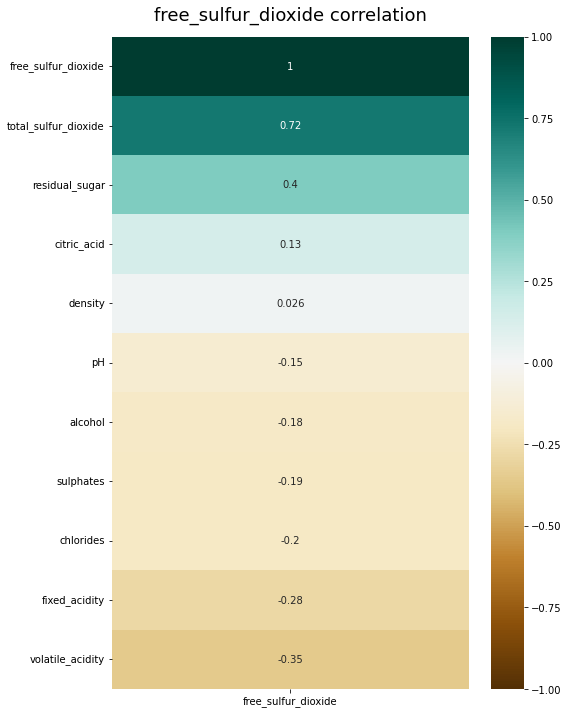

In [15]:
heatmap_cor('free_sulfur_dioxide')

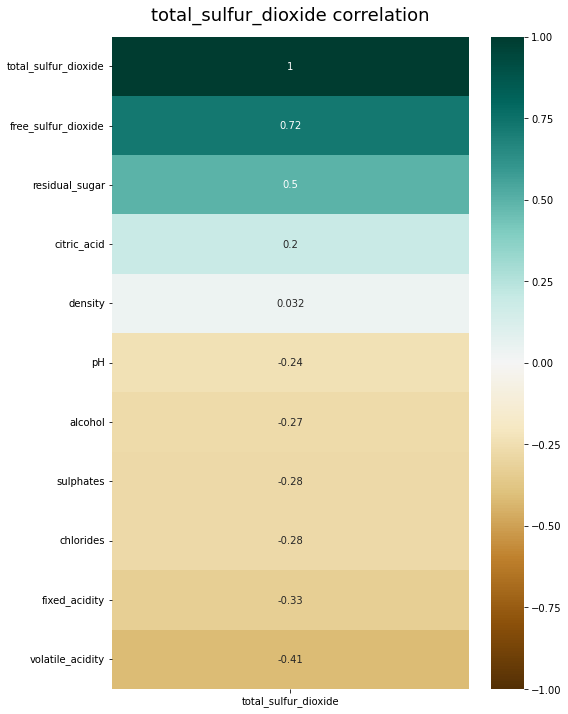

In [16]:
heatmap_cor('total_sulfur_dioxide')

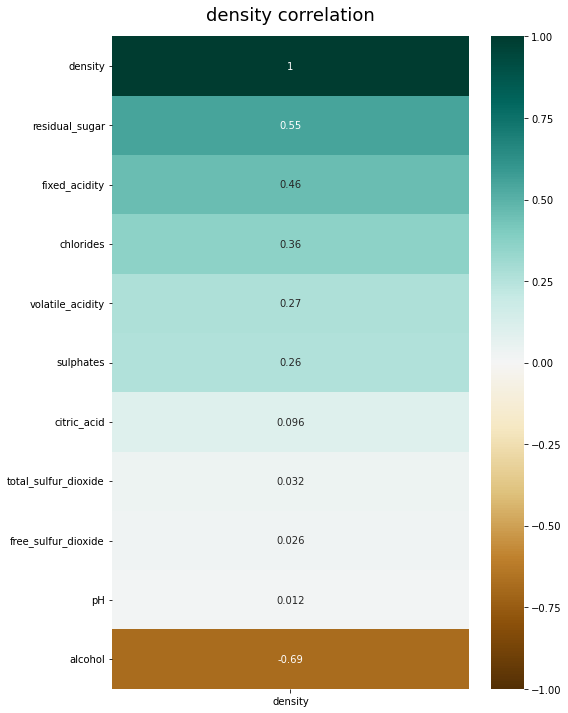

In [17]:
heatmap_cor('density')

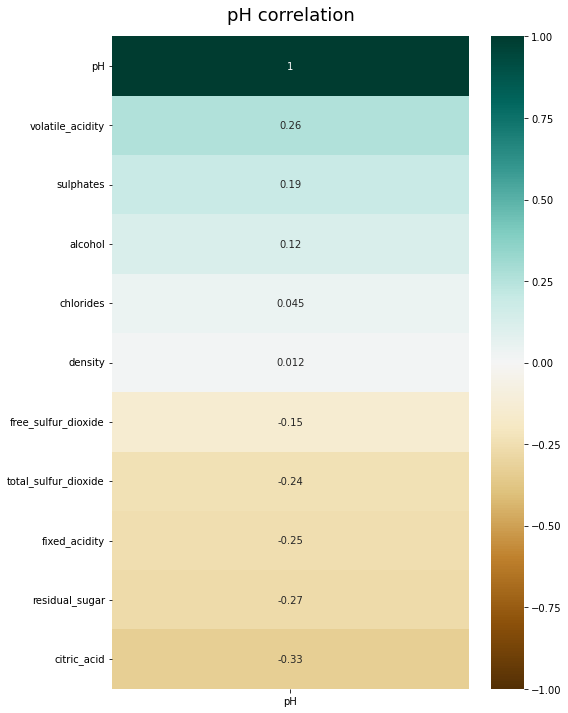

In [18]:
heatmap_cor('pH')

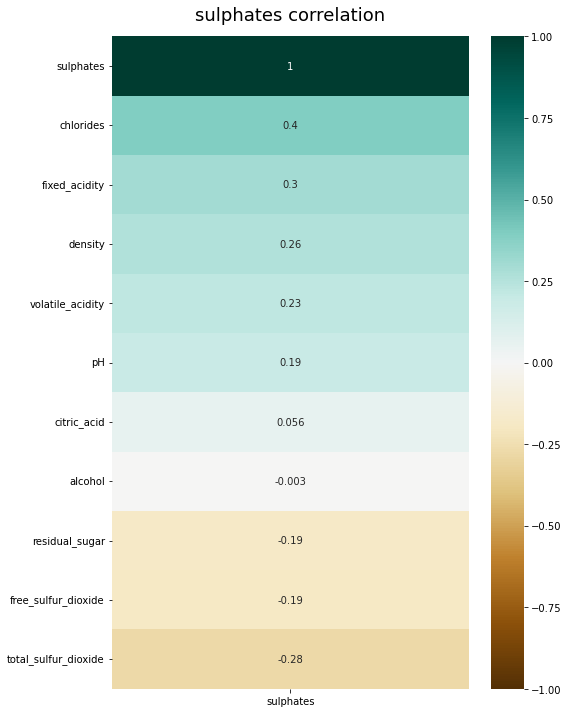

In [19]:
heatmap_cor('sulphates')

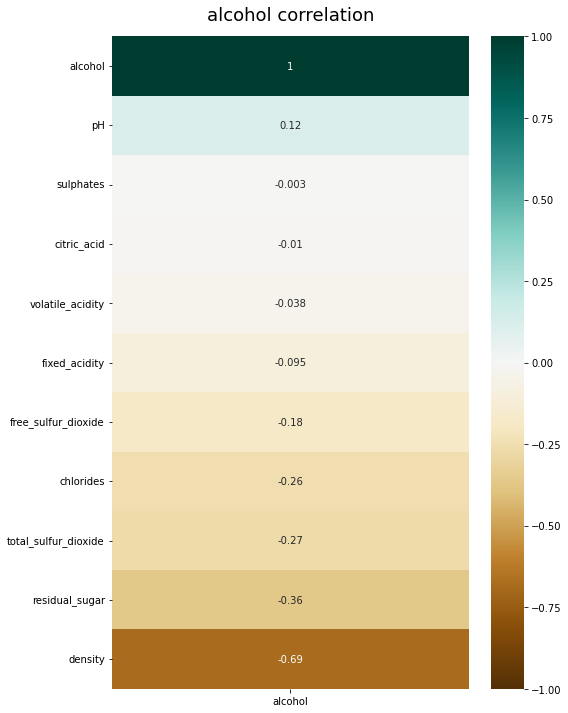

In [20]:
heatmap_cor('alcohol')

BOX PLOTS:

In [21]:
### Box Plot Function:

def box_plot(variable):
    alcohol_box = px.box(df_redwhite,
    x = "wine_type",
    y = variable,
    title= variable + " " + "Box Plot",
    color="wine_type"
)

    alcohol_box.show()

def box_plot_2(variable):
    alcohol_box = px.box(df_redwhite,
    y = variable,
    title= variable + " " + "Box Plot"
)
    alcohol_box.show()   

In [22]:
box_plot('fixed_acidity')

In [23]:
box_plot('volatile_acidity')

In [24]:
box_plot('citric_acid')

In [25]:
box_plot('residual_sugar')

In [26]:
box_plot('chlorides')

In [27]:
box_plot('free_sulfur_dioxide')

In [28]:
box_plot("density")

In [29]:
box_plot("pH")

In [30]:
box_plot("sulphates")

In [31]:
box_plot("alcohol")

In [32]:
box_plot("quality")

Histograms:

In [33]:
### Histogram Function:
def histo_plot(variable):
    histo = px.histogram(df_redwhite,
                                    x = variable,
                                    title = variable + " " + "Histogram",
                                    color ="wine_type",
                        )
    histo.show()

In [34]:
histo_plot('fixed_acidity')

In [35]:
histo_plot('volatile_acidity')

In [36]:
histo_plot('citric_acid')

In [37]:
histo_plot('residual_sugar')

In [38]:
histo_plot('chlorides')

In [39]:
histo_plot('free_sulfur_dioxide')

In [40]:
histo_plot('density')

In [41]:
histo_plot('pH')

In [42]:
histo_plot('sulphates')

In [43]:
histo_plot('alcohol')

In [44]:
histo_plot('quality')

Scatterplot Matrix:

In [45]:
scater_fig = px.scatter_matrix(df_redwhite,
                                    dimensions=['fixed_acidity', 'volatile_acidity', 'citric_acid',
                                                'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
                                                'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
                                    color = "wine_type"
                            )


scater_fig.update_layout(
    title='Correlation Matrix',
    dragmode='select',
    width = 2000,
    height = 2000,
    hovermode='closest'
)

scater_fig.show()

Summary Stats, Nulls & Outliers:

In [46]:
print(df_redwhite.describe())


                ID  fixed_acidity  volatile_acidity  citric_acid  \
count  6497.000000    6497.000000       6497.000000  6497.000000   
mean   3249.000000       7.215307          0.339666     0.318633   
std    1875.666681       1.296434          0.164636     0.145318   
min       1.000000       3.800000          0.080000     0.000000   
25%    1625.000000       6.400000          0.230000     0.250000   
50%    3249.000000       7.000000          0.290000     0.310000   
75%    4873.000000       7.700000          0.400000     0.390000   
max    6497.000000      15.900000          1.580000     1.660000   

       residual_sugar    chlorides  free_sulfur_dioxide  total_sulfur_dioxide  \
count     6497.000000  6497.000000          6497.000000           6497.000000   
mean         5.443235     0.056034            30.525319            115.744574   
std          4.757804     0.035034            17.749400             56.521855   
min          0.600000     0.009000             1.000000        

Summary Statistics: Mode

In [47]:
df_redwhite_continuous.mode().head(1)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            6.8              0.28          0.3             2.0      0.044   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 29.0                 111.0   0.9972  3.16        0.5   

   alcohol  
0      9.5

Missing Values by Column

In [48]:
df_redwhite.isna().sum()

ID                      0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
quality_bin             0
dtype: int64

Outliers: EDA (visible outliers from plots):

In [49]:
# Outliers
df_outliers = df_redwhite[(df_redwhite['ID'] == 259) | (df_redwhite['ID'] == 152) | (df_redwhite['ID'] == 2345) | (df_redwhite['ID'] == 4381) | (df_redwhite['ID'] == 6345) | (df_redwhite['ID'] == 93) | (df_redwhite['ID'] == 87) | (df_redwhite['ID'] == 92) | (df_redwhite['ID'] == 1300)]
df_outliers

ID  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
86      87            8.6             0.490         0.28             1.9   
91      92            8.6             0.490         0.28             1.9   
92      93            8.6             0.490         0.29             2.0   
151    152            9.2             0.520         1.00             3.4   
258    259            7.7             0.410         0.76             1.8   
1299  1300            7.6             1.580         0.00             2.1   
2344  2345            7.4             0.200         1.66             2.1   
4380  4381            7.8             0.965         0.60            65.8   
6344  6345            6.1             0.260         0.25             2.9   

      chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
86        0.110                 20.0                 136.0  0.99720  2.93   
91        0.110                 20.0                 136.0  0.99720  2.93   
92        0.110                 19.0                 133.0  0.99720  2.93   
151       0.610                 32.0                  69.0  0.99960  2.74   
258       0.611                  8.0                  45.0  0.99680  3.06   
1299      0.137                  5.0                   9.0  0.99476  3.50   
2344      0.022                 34.0                 113.0  0.99165  3.26   
4380      0.074                  8.0                 160.0  1.03898  3.39   
6344      0.047                289.0                 440.0  0.99314  3.44   

      sulphates  alcohol  quality wine_type quality_bin  
86         1.95      9.9        6       red           0  
91         1.95      9.9        6       red           0  
92         1.98      9.8        5       red           0  
151        2.00      9.4        4       red           0  
258        1.26      9.4        5       red           0  
1299       0.40     10.9        3       red           0  
2344       0.55     12.2        6     white           0  
4380       0.69     11.7        6     white           0  
6344       0.64     10.5        3     white           0

Outliers: Z-Score

In [50]:
#outlier z score
df_redwhite_zscore = pd.DataFrame()
df_redwhite_zscore['fixed_acidity_z'] = stats.zscore(df_redwhite['fixed_acidity'])
df_redwhite_zscore['volatile_acidity_z'] = stats.zscore(df_redwhite['volatile_acidity'])
df_redwhite_zscore['citric_acid_z'] = stats.zscore(df_redwhite['citric_acid'])
df_redwhite_zscore['residual_sugar_z'] = stats.zscore(df_redwhite['residual_sugar'])
df_redwhite_zscore['chlorides_z'] = stats.zscore(df_redwhite['chlorides'])
df_redwhite_zscore['free_sulfur_dioxide_z'] = stats.zscore(df_redwhite['free_sulfur_dioxide'])
df_redwhite_zscore['total_sulfur_dioxide_z'] = stats.zscore(df_redwhite['total_sulfur_dioxide'])
df_redwhite_zscore['density_z'] = stats.zscore(df_redwhite['density'])
df_redwhite_zscore['pH_z'] = stats.zscore(df_redwhite['pH'])
df_redwhite_zscore['sulphates_z'] = stats.zscore(df_redwhite['sulphates'])
df_redwhite_zscore['alcohol_z'] = stats.zscore(df_redwhite['alcohol'])


Count of outliers using Z-Score of 3

In [51]:
# 3 Z score
df_redwhite_zscore_3_outliers = df_redwhite_zscore[(df_redwhite_zscore['fixed_acidity_z'] <= -3) | (df_redwhite_zscore['fixed_acidity_z'] >= 3) |(df_redwhite_zscore['volatile_acidity_z'] <= -3) | (df_redwhite_zscore['volatile_acidity_z'] >= 3)| (df_redwhite_zscore['citric_acid_z'] <= -3) | (df_redwhite_zscore['citric_acid_z'] >= 3) | (df_redwhite_zscore['residual_sugar_z'] <= -3) | (df_redwhite_zscore['residual_sugar_z'] >= 3) | (df_redwhite_zscore['chlorides_z'] <= -3) | (df_redwhite_zscore['chlorides_z'] >= 3) | (df_redwhite_zscore['free_sulfur_dioxide_z'] <= -3) | (df_redwhite_zscore['free_sulfur_dioxide_z'] >= 3) | (df_redwhite_zscore['total_sulfur_dioxide_z'] <= -3) | (df_redwhite_zscore['total_sulfur_dioxide_z'] >= 3) | (df_redwhite_zscore['density_z'] <= -3) | (df_redwhite_zscore['density_z'] >= 3) | (df_redwhite_zscore['pH_z'] <= -3) | (df_redwhite_zscore['pH_z'] >= 3) | (df_redwhite_zscore['sulphates_z'] <= -3) | (df_redwhite_zscore['sulphates_z'] >= 3) | (df_redwhite_zscore['alcohol_z'] <= -3) | (df_redwhite_zscore['alcohol_z'] >= 3)]
print(df_redwhite_zscore_3_outliers.shape[0], 'Observations with a z-score greater than or equal to 3')
# 488 Outliers with a z score (+/-) 3

488 Observations with a z-score greater than or equal to 3


Count of outliers using Z-Score of 6

In [52]:
# 6 Z score
df_redwhite_zscore_6_outliers = df_redwhite_zscore[(df_redwhite_zscore['fixed_acidity_z'] <= -6) | (df_redwhite_zscore['fixed_acidity_z'] >= 6) |(df_redwhite_zscore['volatile_acidity_z'] <= -6) | (df_redwhite_zscore['volatile_acidity_z'] >= 6)| (df_redwhite_zscore['citric_acid_z'] <= -6) | (df_redwhite_zscore['citric_acid_z'] >= 6) | (df_redwhite_zscore['residual_sugar_z'] <= -6) | (df_redwhite_zscore['residual_sugar_z'] >= 6) | (df_redwhite_zscore['chlorides_z'] <= -6) | (df_redwhite_zscore['chlorides_z'] >= 6) | (df_redwhite_zscore['free_sulfur_dioxide_z'] <= -6) | (df_redwhite_zscore['free_sulfur_dioxide_z'] >= 6) | (df_redwhite_zscore['total_sulfur_dioxide_z'] <= -6) | (df_redwhite_zscore['total_sulfur_dioxide_z'] >= 6) | (df_redwhite_zscore['density_z'] <= -6) | (df_redwhite_zscore['density_z'] >= 6) | (df_redwhite_zscore['pH_z'] <= -6) | (df_redwhite_zscore['pH_z'] >= 6) | (df_redwhite_zscore['sulphates_z'] <= -6) | (df_redwhite_zscore['sulphates_z'] >= 6) | (df_redwhite_zscore['alcohol_z'] <= -6) | (df_redwhite_zscore['alcohol_z'] >= 6)]
print(df_redwhite_zscore_6_outliers.shape[0], 'Observations with a z-score greater than or equal to 6')
# 49 Outliers with a z score (+/-) 6

49 Observations with a z-score greater than or equal to 6


Count of outliers using Z-Score of 9

In [53]:
# 9 Z score
df_redwhite_zscore_9_outliers = df_redwhite_zscore[(df_redwhite_zscore['fixed_acidity_z'] <= -9) | (df_redwhite_zscore['fixed_acidity_z'] >= 9) |(df_redwhite_zscore['volatile_acidity_z'] <= -9) | (df_redwhite_zscore['volatile_acidity_z'] >= 9)| (df_redwhite_zscore['citric_acid_z'] <= -9) | (df_redwhite_zscore['citric_acid_z'] >= 9) | (df_redwhite_zscore['residual_sugar_z'] <= -9) | (df_redwhite_zscore['residual_sugar_z'] >= 9) | (df_redwhite_zscore['chlorides_z'] <= -9) | (df_redwhite_zscore['chlorides_z'] >= 9) | (df_redwhite_zscore['free_sulfur_dioxide_z'] <= -9) | (df_redwhite_zscore['free_sulfur_dioxide_z'] >= 9) | (df_redwhite_zscore['total_sulfur_dioxide_z'] <= -9) | (df_redwhite_zscore['total_sulfur_dioxide_z'] >= 9) | (df_redwhite_zscore['density_z'] <= -9) | (df_redwhite_zscore['density_z'] >= 9) | (df_redwhite_zscore['pH_z'] <= -9) | (df_redwhite_zscore['pH_z'] >= 9) | (df_redwhite_zscore['sulphates_z'] <= -9) | (df_redwhite_zscore['sulphates_z'] >= 9) | (df_redwhite_zscore['alcohol_z'] <= -9) | (df_redwhite_zscore['alcohol_z'] >= 9)]
print(df_redwhite_zscore_9_outliers.shape[0], 'Observations with a z-score greater than or equal to 9')
# 20 Outliers with a z score (+/-) 9

20 Observations with a z-score greater than or equal to 9


Count of outliers using Z-Score of 12

In [54]:
# 12 Z score
df_redwhite_zscore_12_outliers = df_redwhite_zscore[(df_redwhite_zscore['fixed_acidity_z'] <= -12) | (df_redwhite_zscore['fixed_acidity_z'] >= 12) |(df_redwhite_zscore['volatile_acidity_z'] <= -12) | (df_redwhite_zscore['volatile_acidity_z'] >= 12)| (df_redwhite_zscore['citric_acid_z'] <= -12) | (df_redwhite_zscore['citric_acid_z'] >= 12) | (df_redwhite_zscore['residual_sugar_z'] <= -12) | (df_redwhite_zscore['residual_sugar_z'] >= 12) | (df_redwhite_zscore['chlorides_z'] <= -12) | (df_redwhite_zscore['chlorides_z'] >= 12) | (df_redwhite_zscore['free_sulfur_dioxide_z'] <= -12) | (df_redwhite_zscore['free_sulfur_dioxide_z'] >= 12) | (df_redwhite_zscore['total_sulfur_dioxide_z'] <= -12) | (df_redwhite_zscore['total_sulfur_dioxide_z'] >= 12) | (df_redwhite_zscore['density_z'] <= -12) | (df_redwhite_zscore['density_z'] >= 12) | (df_redwhite_zscore['pH_z'] <= -12) | (df_redwhite_zscore['pH_z'] >= 12) | (df_redwhite_zscore['sulphates_z'] <= -12) | (df_redwhite_zscore['sulphates_z'] >= 12) | (df_redwhite_zscore['alcohol_z'] <= -12) | (df_redwhite_zscore['alcohol_z'] >= 12)]
print(df_redwhite_zscore_12_outliers.shape[0], 'Observations with a z-score greater than or equal to 12')
# 4 Outliers with a z score (+/-) 12

4 Observations with a z-score greater than or equal to 12


Count of outliers using Z-Score of 15

In [55]:
# 15 Z score
df_redwhite_zscore_15_outliers = df_redwhite_zscore[(df_redwhite_zscore['fixed_acidity_z'] <= -15) | (df_redwhite_zscore['fixed_acidity_z'] >= 15) |(df_redwhite_zscore['volatile_acidity_z'] <= -15) | (df_redwhite_zscore['volatile_acidity_z'] >= 15)| (df_redwhite_zscore['citric_acid_z'] <= -15) | (df_redwhite_zscore['citric_acid_z'] >= 15) | (df_redwhite_zscore['residual_sugar_z'] <= -15) | (df_redwhite_zscore['residual_sugar_z'] >= 15) | (df_redwhite_zscore['chlorides_z'] <= -15) | (df_redwhite_zscore['chlorides_z'] >= 15) | (df_redwhite_zscore['free_sulfur_dioxide_z'] <= -15) | (df_redwhite_zscore['free_sulfur_dioxide_z'] >= 15) | (df_redwhite_zscore['total_sulfur_dioxide_z'] <= -15) | (df_redwhite_zscore['total_sulfur_dioxide_z'] >= 15) | (df_redwhite_zscore['density_z'] <= -15) | (df_redwhite_zscore['density_z'] >= 15) | (df_redwhite_zscore['pH_z'] <= -15) | (df_redwhite_zscore['pH_z'] >= 15) | (df_redwhite_zscore['sulphates_z'] <= -15) | (df_redwhite_zscore['sulphates_z'] >= 15) | (df_redwhite_zscore['alcohol_z'] <= -15) | (df_redwhite_zscore['alcohol_z'] >= 15)]
print(df_redwhite_zscore_15_outliers.shape[0], 'Observations with a z-score greater than or equal to 15')
# 2 Outliers with a z score (+/-) 15

2 Observations with a z-score greater than or equal to 15


Filter dataframe, removing outliers with a z-score greater than or equal to 3:

In [56]:
df_index = df_redwhite.index
outlier_index = df_redwhite_zscore_3_outliers.index
mask = ~df_index.isin(outlier_index)
df_with_no_outliers = df_redwhite.loc[mask]

Log (x+1) transformation

In [57]:
# LOG(x+1) TRANSFORMATION
to_log = ['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
df_log = df_with_no_outliers[to_log].applymap(lambda x: np.log(x+1))

# rename columns
df_log.columns = 'log_' + df_log.columns
df_log['quality_bin'] = df_redwhite['quality_bin']
# shift the index
df_log.index = df_log.index + 1

Rename Columns

Z-Score Method B

In [58]:
df_z_continious = df_redwhite[["fixed_acidity", "volatile_acidity", "citric_acid",	"residual_sugar", "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates" , "alcohol"]]
try:
    for x in df_redwhite:
        col_zscore = x + '_zscore'
        df_redwhite[col_zscore] = (df_redwhite[x] - df_redwhite[x].mean())/df_redwhite[x].std(ddof=0)
except:
    print('ERROR')

ERROR


Measure Skewness:

In [59]:
a = stats.skew(df_redwhite_continuous)
a

array([ 1.72289176e+00,  1.49475134e+00,  4.71621754e-01,  1.43507284e+00,
        5.39858096e+00,  1.21978437e+00, -1.17720637e-03,  5.03485453e-01,
        3.86749481e-01,  1.79685503e+00,  5.65587110e-01])

Min Max Scaling:

In [61]:
scaler = MinMaxScaler()
scaler.fit(df_redwhite_continuous)
scaler.data_max_
scaler.transform(df_redwhite_continuous)
array_redwhite_continuous_min_max_scaled = scaler.transform(df_redwhite_continuous)
df_redwhite_continuous_min_max_scaled = pd.DataFrame(array_redwhite_continuous_min_max_scaled, columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar','chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density','pH', 'sulphates', 'alcohol'])
df_redwhite_continuous_min_max_scaled.describe()
stats.skew(df_redwhite_continuous_min_max_scaled)

array([ 1.72289176e+00,  1.49475134e+00,  4.71621754e-01,  1.43507284e+00,
        5.39858096e+00,  1.21978437e+00, -1.17720637e-03,  5.03485453e-01,
        3.86749481e-01,  1.79685503e+00,  5.65587110e-01])

In [62]:
print(stats.skew(df_redwhite_continuous_min_max_scaled))
df_redwhite_continuous_min_max_scaled_LOG10 = np.log10((df_redwhite_continuous_min_max_scaled))
b = stats.skew(df_redwhite_continuous_min_max_scaled_LOG10)


[ 1.72289176e+00  1.49475134e+00  4.71621754e-01  1.43507284e+00
  5.39858096e+00  1.21978437e+00 -1.17720637e-03  5.03485453e-01
  3.86749481e-01  1.79685503e+00  5.65587110e-01]


c:\Users\mmamt\anaconda3\envs\pycaret\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning:

divide by zero encountered in log10

c:\Users\mmamt\anaconda3\envs\pycaret\lib\site-packages\scipy\stats\stats.py:1082: RuntimeWarning:

invalid value encountered in subtract



In [63]:
print(df_redwhite_continuous_min_max_scaled_LOG10)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0         -0.526483         -0.383700         -inf       -1.700304  -0.953522   
1         -0.480725         -0.273001         -inf       -1.513218  -0.830206   
2         -0.480725         -0.343582    -1.618048       -1.583799  -0.860518   
3         -0.213554         -0.875061    -0.471920       -1.700304  -0.960053   
4         -0.526483         -0.383700         -inf       -1.700304  -0.953522   
...             ...               ...          ...             ...        ...   
6492      -0.702574         -1.062148    -0.757710       -1.814248  -1.302475   
6493      -0.635627         -0.795880    -0.663806       -0.945016  -1.199813   
6494      -0.651422         -0.971971    -0.941354       -2.036096  -1.274447   
6495      -0.852336         -0.853872    -0.742987       -2.115278  -1.665653   
6496      -0.740363         -1.062148    -0.640324       -2.513218  -1.738204   

      free_sulfur_dioxide  

## Multiple Linear Regression

### SKLEARN

In [64]:
# VARIABLE SELECTION

x = df_redwhite[["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates" , "alcohol"]]
y = df_redwhite[["quality"]]

x = np.array(x)
y = np.array(y)


# Spliting the Data: 80% train/ 20% test
X_test, X_train, Y_test, Y_train = train_test_split(x, y, test_size= 0.2)


In [65]:
model = LinearRegression()
model.fit (X_train, Y_train.ravel())
predictions = model.predict(X_test)
print(model.score(x,y))

0.288528825661837


In [66]:
predictions = model.predict(x)
print(len(predictions))

6497


In [67]:
model.coef_

array([ 4.22845542e-03, -1.36139419e+00, -4.80189209e-02,  2.81628012e-02,
       -6.36845477e-01,  4.89723854e-03, -2.61075336e-03, -1.41774404e+01,
        3.02998265e-01,  5.99867366e-01,  2.92586253e-01])

In [68]:
model.intercept_

16.039715970157573

### Statsmodels

In [69]:
model_sm = sm.OLS(y,x).fit()
predictions = model_sm.predict(x) # make the predictions by the model

# Print out the statistics
model_sm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          3.710e+04
Date:                Mon, 24 Apr 2023   Prob (F-statistic):                        0.00
Time:                        16:49:53   Log-Likelihood:                         -7226.4
No. Observations:                6497   AIC:                                  1.447e+04
Df Residuals:                    6486   BIC:                                  1.455e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0100      0.010      1.047      0.295      -0.009       0.029
x2            -1.4573      0.072    -20.130      0.000      -1.599      -1.315
x3            -0.1137      0.080     -1.426      0.154      -0.270       0.043
x4             0.0221      0.002      9.259      0.000       0.017       0.027
x5            -0.7955      0.326     -2.436      0.015      -1.436      -0.155
x6             0.0060      0.001      7.966      0.000       0.005       0.007
x7            -0.0022      0.000     -8.228      0.000      -0.003      -0.002
x8             1.9225      0.281      6.837      0.000       1.371       2.474
x9             0.1641      0.069      2.384      0.017       0.029       0.299
x10            0.6408      0.071      8.998      0.000       0.501       0.780
x11            0.3333      0.009     37.212      0.000       0.316       0.351
==============================================================================
Omnibus:                      140.142   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.565
Skew:                           0.010   Prob(JB):                     2.21e-68
Kurtosis:                       4.073   Cond. No.                     4.98e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### PYCARET - High level/low code machine learning tool

In [ ]:
df_1 = df_redwhite
# Drop variables since wont be of value in our analysis 
df_1 = df_1.drop(columns=['ID', 'wine_type', 'quality'])

print(df_1.shape)

In [ ]:
exp_reg101 = setup(data = df_1, target = 'quality_bin', session_id=124)

compare_models()

### Model/s Evaluation

#### Model 1

In [ ]:
results = pull()
results.Model.tolist()
top_model = results.Model[0]

if top_model == 'Extra Trees Classifier': top_model = "et"
if top_model == 'Random Forest Classifier': top_model = "rf"
if top_model == 'Extreme Gradient Boosting': top_model = "xgboost"
if top_model == 'Light Gradient Boosting Machine': top_model = "lightgbm"
if top_model == 'CatBoost Classifier': top_model = "catboost"
if top_model == 'Gradient Boosting Classifier': top_model = "gbc"
if top_model == 'Ada Boost Classifier': top_model = "ada"
if top_model == 'Decision Tree Classifier': top_model = "dt"
if top_model == 'Logistic Regression': top_model = "lr"
if top_model == 'Ridge Classifier': top_model = "ridge"
if top_model == 'Linear Discriminant Analysis': top_model = "lda"
if top_model == 'Dummy Classifier': top_model = "dummy"
if top_model == 'K Neighbors Classifier': top_model = "knn"
if top_model == 'SVM - Linear Kernel': top_model = "svm"
if top_model == 'Quadratic Discriminant Analysis': top_model = "qda"
if top_model == 'Naive Bayes': top_model = "nb"

top_m = create_model(top_model)

In [ ]:
plot_model(top_m, plot = 'auc')

In [ ]:
plot_model(top_m, plot = 'pr')

In [ ]:
plot_model(top_m, plot='feature')

In [ ]:
plot_model(top_m, plot = 'confusion_matrix')

In [ ]:
predict_model(top_m)

In [ ]:
print(top_m.feature_importances_)
xtrain_cols = get_config('X_train').columns
xtrain_cols

#### MODEL #2: ( predict if wine is higher than a 7 quality rating based on its physicochemical components ) [without outliers]

In [ ]:
df_2 = df_with_no_outliers

# Drop variables since wont be of value in our analysis 
df_2 = df_2.drop(columns=['ID', 'wine_type', 'quality'])

print(df_2.shape)

In [ ]:
exp_reg101 = setup(data = df_2, target = 'quality_bin', session_id=124)

compare_models()

In [ ]:
results = pull()
results.Model.tolist()
top_model = results.Model[0]

if top_model == 'Extra Trees Classifier': top_model = "et"
if top_model == 'Random Forest Classifier': top_model = "rf"
if top_model == 'Extreme Gradient Boosting': top_model = "xgboost"
if top_model == 'Light Gradient Boosting Machine': top_model = "lightgbm"
if top_model == 'CatBoost Classifier': top_model = "catboost"
if top_model == 'Gradient Boosting Classifier': top_model = "gbc"
if top_model == 'Ada Boost Classifier': top_model = "ada"
if top_model == 'Decision Tree Classifier': top_model = "dt"
if top_model == 'Logistic Regression': top_model = "lr"
if top_model == 'Ridge Classifier': top_model = "ridge"
if top_model == 'Linear Discriminant Analysis': top_model = "lda"
if top_model == 'Dummy Classifier': top_model = "dummy"
if top_model == 'K Neighbors Classifier': top_model = "knn"
if top_model == 'SVM - Linear Kernel': top_model = "svm"
if top_model == 'Quadratic Discriminant Analysis': top_model = "qda"
if top_model == 'Naive Bayes': top_model = "nb"

top_m = create_model(top_model)

In [ ]:
plot_model(top_m, plot = 'auc')

In [ ]:
plot_model(top_m, plot = 'pr')

In [ ]:
plot_model(top_m, plot='feature')

In [ ]:
plot_model(top_m, plot = 'confusion_matrix')

In [ ]:
predict_model(top_m)

#### Model#3: ( predict if wine is higher than a 7 quality rating based on its physicochemical components ) [with outliers and LOG(x+1) transformation]

In [ ]:
df_3 = df_log
print(df_3.shape)

In [ ]:
exp_reg101 = setup(data = df_3, target = 'quality_bin', session_id=124)

print(compare_models())

In [ ]:
results = pull()
results.Model.tolist()
top_model = results.Model[0]

if top_model == 'Extra Trees Classifier': top_model = "et"
if top_model == 'Random Forest Classifier': top_model = "rf"
if top_model == 'Extreme Gradient Boosting': top_model = "xgboost"
if top_model == 'Light Gradient Boosting Machine': top_model = "lightgbm"
if top_model == 'CatBoost Classifier': top_model = "catboost"
if top_model == 'Gradient Boosting Classifier': top_model = "gbc"
if top_model == 'Ada Boost Classifier': top_model = "ada"
if top_model == 'Decision Tree Classifier': top_model = "dt"
if top_model == 'Logistic Regression': top_model = "lr"
if top_model == 'Ridge Classifier': top_model = "ridge"
if top_model == 'Linear Discriminant Analysis': top_model = "lda"
if top_model == 'Dummy Classifier': top_model = "dummy"
if top_model == 'K Neighbors Classifier': top_model = "knn"
if top_model == 'SVM - Linear Kernel': top_model = "svm"
if top_model == 'Quadratic Discriminant Analysis': top_model = "qda"
if top_model == 'Naive Bayes': top_model = "nb"

top_m = create_model(top_model)

In [ ]:
plot_model(top_m, plot = 'auc')

In [ ]:
plot_model(top_m, plot = 'pr')

In [ ]:
plot_model(top_m, plot='feature')

In [ ]:
plot_model(top_m, plot = 'confusion_matrix')

In [ ]:
predict_model(top_m)

#### MODEL #4: ( predict if wine is higher than a 7 quality rating based on its physicochemical components ) [without outliers and LOG(x+1) transformation]

In [ ]:
df_4 = 